In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [90]:
df = pd.read_csv('Purchased_Dataset.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [91]:
df_x = pd.get_dummies(df.iloc[:,1:-1], drop_first=True)
df_y = df.iloc[:,-1:]

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_x = pd.DataFrame(scaler.fit_transform(df_x), columns=df_x.columns)

In [93]:
df_x.head()

,Age,EstimatedSalary,Gender_Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [94]:
df_y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3)

In [96]:
knn_error_rate = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for i in np.arange(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values[:,0])
    y_pred = knn.predict(x_test)
    knn_error_rate.append(accuracy_score(y_test, y_pred))

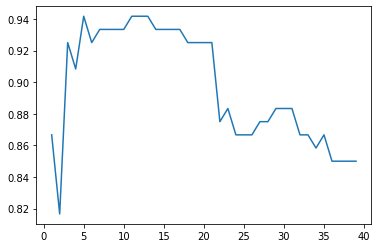

In [97]:
sns.lineplot(x = np.arange(1,40), y = knn_error_rate)
plt.show()

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train.values[:,0])
y_pred = knn.predict(x_test)

In [138]:
knn.predict_proba(x_test)[:,0]

array([0. , 1. , 1. , 1. , 0.2, 0. , 1. , 1. , 0.8, 0.2, 1. , 0.2, 1. ,
       1. , 0.8, 0.2, 0. , 1. , 0.8, 0. , 1. , 1. , 1. , 0. , 0.4, 0.8,
       1. , 1. , 1. , 0.2, 1. , 1. , 0. , 0.2, 1. , 1. , 1. , 1. , 1. ,
       1. , 0.8, 0.8, 0.6, 1. , 1. , 0.2, 0.8, 1. , 1. , 1. , 0.2, 1. ,
       0.4, 0.4, 0.8, 1. , 1. , 1. , 0. , 1. , 0.4, 1. , 0. , 0.2, 0. ,
       0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.6, 0. , 1. , 1. ,
       1. , 1. , 1. , 0.4, 0. , 1. , 0.6, 1. , 0.8, 0.6, 1. , 0.2, 1. ,
       1. , 0. , 0.2, 1. , 1. , 0.8, 0.2, 1. , 1. , 1. , 1. , 0.8, 0. ,
       0. , 0.2, 1. , 1. , 1. , 0.4, 0. , 0.4, 1. , 0. , 1. , 1. , 0.2,
       1. , 1. , 0.2])

In [141]:
knn.score(y_test, y_pred)

ValueError: query data dimension must match training data dimension

In [99]:
print(accuracy_score(y_test, y_pred))

0.9416666666666667


In [100]:
print(confusion_matrix(y_test, y_pred))

[[77  3]
 [ 4 36]]


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        80
           1       0.92      0.90      0.91        40

    accuracy                           0.94       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.94      0.94       120



In [102]:
from sklearn.model_selection import cross_val_score
knn1 = KNeighborsClassifier(n_neighbors=10)
cross_val_score(knn1, df_x, df_y.values[:,0], scoring='accuracy', cv=15).mean()

0.9093881427214761

In [103]:
df_y.values[:,0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train, y_train.values[:,0])
y_pred_logreg = logreg.predict(x_test)

In [109]:
logreg.score(x_train, y_train.values[:,0])

0.8464285714285714

In [114]:
logreg.score(x_test, y_test)

0.875

In [130]:
logreg.predict_proba(x_test)[:,0]

array([0.32824723, 0.91897471, 0.9407889 , 0.99793088, 0.02233812,
       0.01096532, 0.9552111 , 0.99152071, 0.81414167, 0.04879566,
       0.95212261, 0.10388368, 0.92322439, 0.99441907, 0.7046254 ,
       0.01213309, 0.04464604, 0.99049267, 0.68510537, 0.36079935,
       0.9452435 , 0.94956637, 0.91463514, 0.58770432, 0.15214571,
       0.79159781, 0.99522686, 0.84453428, 0.99358679, 0.01582616,
       0.97287598, 0.94969281, 0.48631484, 0.11685819, 0.97287598,
       0.97641933, 0.60181914, 0.91505318, 0.99803996, 0.87304505,
       0.62850346, 0.83970542, 0.68707616, 0.76941885, 0.90651231,
       0.0594469 , 0.54323962, 0.92609755, 0.92136467, 0.91270679,
       0.1005507 , 0.86647063, 0.68928474, 0.09310822, 0.70810984,
       0.98360514, 0.99362089, 0.77352787, 0.52518534, 0.97203508,
       0.29682271, 0.99248712, 0.64566264, 0.39672789, 0.31058216,
       0.0613835 , 0.72213592, 0.85577868, 0.97626904, 0.66404729,
       0.78139473, 0.98926121, 0.85287814, 0.87322022, 0.56533

In [131]:
accuracy_score(y_test, y_pred_logreg)

0.875

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, treshold = roc_curve(y_test, logreg.predict_proba(x_test)[:,0])

In [133]:
tpr

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.025, 0.025, 0.05 , 0.05 ,
       0.075, 0.075, 0.1  , 0.1  , 0.15 , 0.15 , 0.175, 0.175, 0.225,
       0.225, 0.275, 0.275, 0.375, 0.375, 0.825, 0.825, 1.   ])

In [134]:
fpr

array([0.    , 0.0125, 0.2375, 0.2625, 0.425 , 0.425 , 0.7625, 0.7625,
       0.8125, 0.8125, 0.85  , 0.85  , 0.875 , 0.875 , 0.9   , 0.9   ,
       0.925 , 0.925 , 0.95  , 0.95  , 0.9625, 0.9625, 0.9875, 0.9875,
       1.    , 1.    ])

In [135]:
treshold

array([1.99803996, 0.99803996, 0.97626904, 0.97287598, 0.92785943,
       0.92609755, 0.76941885, 0.74336428, 0.7046254 , 0.68928474,
       0.68369978, 0.67921424, 0.66404729, 0.64467732, 0.62850346,
       0.6194646 , 0.60181914, 0.58086598, 0.54323962, 0.51746053,
       0.48631484, 0.39672789, 0.36079935, 0.04879566, 0.04464604,
       0.01096532])

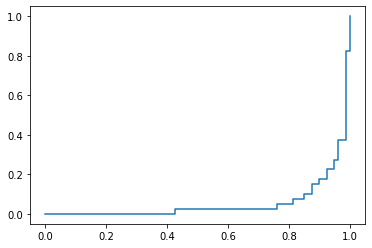

In [136]:
plt.plot(fpr, tpr)
plt.show()

In [24]:
roc_auc_score(y_test, y_pred_logreg)

0.816369676834793

In [25]:
from sklearn.model_selection import KFold
cv_kfold = KFold(n_splits=15)

In [26]:
knn1 = KNeighborsClassifier(n_neighbors=10)
accuracy_rate = []
for i,j in cv_kfold.split(df_x):
    x_train, x_test, y_train, y_test = df_x.iloc[i], df_x.iloc[j], df_y.iloc[i], df_y.iloc[j]
    knn1.fit(x_train, y_train.values[:,0])
    y_pred = knn1.predict(x_test)
    accuracy_rate.append(accuracy_score(y_test, y_pred))
np.mean(accuracy_rate)

0.9123456790123458

In [27]:
accuracy_rate

[1.0,
 0.9629629629629629,
 0.8888888888888888,
 0.9629629629629629,
 1.0,
 0.8888888888888888,
 0.9629629629629629,
 0.7777777777777778,
 0.8518518518518519,
 0.8888888888888888,
 0.8076923076923077,
 0.8076923076923077,
 1.0,
 0.9230769230769231,
 0.9615384615384616]

In [54]:
for i,j in cv_kfold.split(y_train.head(6)):
    print(i)
    print(j)
    print(x_train.iloc[i])
    print(x_train.iloc[j])

[2 3 4 5]
[0 1]
          Age  EstimatedSalary  Gender_Male
235  0.797057         0.271845     1.020204
230 -0.253587         2.268655    -0.980196
81   0.128465        -0.814655     1.020204
102 -0.540127         0.477399    -0.980196
          Age  EstimatedSalary  Gender_Male
338  0.032952        -0.432911    -0.980196
138 -0.922179        -0.315452    -0.980196
[0 1 4 5]
[2 3]
          Age  EstimatedSalary  Gender_Male
338  0.032952        -0.432911    -0.980196
138 -0.922179        -0.315452    -0.980196
81   0.128465        -0.814655     1.020204
102 -0.540127         0.477399    -0.980196
          Age  EstimatedSalary  Gender_Male
235  0.797057         0.271845     1.020204
230 -0.253587         2.268655    -0.980196
[0 1 2 3]
[4 5]
          Age  EstimatedSalary  Gender_Male
338  0.032952        -0.432911    -0.980196
138 -0.922179        -0.315452    -0.980196
235  0.797057         0.271845     1.020204
230 -0.253587         2.268655    -0.980196
          Age  EstimatedSala

In [113]:
df.groupby('Gender').mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735
